# Analyzing Waterfowl data

## Import Necessary Libraries Code Cell:
This is where you import the necessary libraries. Run this cell to ensure all required libraries are available.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/waterfowls/waterfowls.csv
/kaggle/input/waterfowls/population_data.csv
/kaggle/input/waterfowls/conservation_status.csv
/kaggle/input/waterfowls/breeding_info.csv


## Load Datasets Code Cell:
Now create a code cell to load the datasets using the confirmed paths from the previous step. If you see any discrepancies in file names or paths from the output, update them here.


In [2]:
# Load datasets with confirmed paths
waterfowl_df = pd.read_csv('/kaggle/input/waterfowls/waterfowls.csv')

population_data_df = pd.read_csv('/kaggle/input/waterfowls/population_data.csv')

conservation_status_df = pd.read_csv('/kaggle/input/waterfowls/conservation_status.csv')

breeding_info_df = pd.read_csv('/kaggle/input/waterfowls/breeding_info.csv')


## Display First Few Rows of Each DataFrame Code Cell:
Create another code cell to display the first few rows of each dataframe. Run this cell after successfully loading the datasets.

In [3]:
# Display first few rows of each dataframe to verify successful loading
print("Waterfowl DataFrame: ")
display(waterfowl_df.head())

print("Population Data DataFrame: ")
display(population_data_df.head())

print("Conservation Status DataFrame: ")
display(conservation_status_df.head())

print("Breeding Info DataFrame: ")
display(breeding_info_df.head())

Waterfowl DataFrame: 


,id,name,type,latin_name,m_avg_length_inches,f_avg_length_inches,m_avg_weight_lbs,f_avg_weight_lbs,life_span_year,egg_avg
0,1,American Black Duck,Dabbling Duck,Anas rubripes,22.0,21,2.7,2.4,10-15,9
1,2,American Coot,Other,Fulica americana,16.2,16.2,1.5,1.2,2-3,6-11
2,3,American Wigeon,Dabbling Duck,Mareca americana,20.0,19,1.8,1.6,5-10,9
3,4,Barnacle Goose,Goose,Branta leucopsis,27.0,23.5,4.03,3.57,10-20,4-6
4,5,Barrow's Goldeneye,Diving Duck,Buchephala islandica,19.2,17,2.13,1.31,10-15,6-9


Population Data DataFrame: 


,id,waterfowl_id,population,migration
0,1,1,Black duck populations declined steeply betwee...,Black ducks are most common in the Atlantic an...
1,2,2,While limited numbers of coots can still be fo...,The highest coot breeding density exists in th...
2,3,3,The American Wigeon can be found all over Nort...,American Wigeon are among the earliest waterfo...
3,4,4,There are four distinct populations of the bar...,The Greenland population of barnacle geese win...
4,5,5,Ninety percent of the Barrow's goldeneye popul...,"In winter, Barrow's goldeneyes are often obser..."


Conservation Status DataFrame: 


,id,waterfowl_id,conservation_status,image
0,1,1,Least Concern,https://www.ducks.org/files/live/sites/ducksor...
1,2,2,Least Concern,https://www.ducks.org/files/live/sites/ducksor...
2,3,3,Least Concern,https://www.ducks.org/files/live/sites/ducksor...
3,4,4,Least Concern,https://www.ducks.org/files/live/sites/ducksor...
4,5,5,Least Concern,https://www.ducks.org/files/live/sites/ducksor...


Breeding Info DataFrame: 


,id,waterfowl_id,description,breeding,food_habits
0,1,1,American black ducks are similar to mallards i...,The American black duck breeds from the upper ...,American black ducks dabble in shallow water t...
1,2,2,"While the American coot resembles a duck, it i...",Nests are built floating on the water and atta...,"While typically herbivores, coots are opportun..."
2,3,3,Both males and females have a bluish black-tip...,American Wigeon nest farther north than any ot...,American wigeon are aquatic grazers and forage...
3,4,4,"Barnacle geese have a black chest, neck and cr...",Barnacle geese breed along the northeast coast...,Barnacle geese feed on grasses and coastal pla...
4,5,5,"In flight, a Barrow's goldeneye is difficult t...",Barrow's goldeneyes breed in southeastern Alas...,Barrow's goldeneyes dive to feed on aquatic in...


## Data Exploration and Cleaning

In [4]:
# Create a consolidated DataFrame for missing values
missing_values = {
    'Waterfowl': waterfowl_df.isnull().sum(),
    'Population Data': population_data_df.isnull().sum(),
    'Conservation Status': conservation_status_df.isnull().sum(),
    'Breeding Info': breeding_info_df.isnull().sum()
}

# Create a DataFrame from the dictionary and transpose it for better readability
missing_values_df = pd.DataFrame(missing_values).transpose()

# Display the consolidated table of missing values
print("Missing Values Summary:")
display(missing_values_df)

Missing Values Summary:


,breeding,conservation_status,description,egg_avg,f_avg_length_inches,f_avg_weight_lbs,food_habits,id,image,latin_name,life_span_year,m_avg_length_inches,m_avg_weight_lbs,migration,name,population,type,waterfowl_id
Waterfowl,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN
Population Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0
Conservation Status,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Breeding Info,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


# Visualizations for Waterfowl Dataset

1. Species Distribution by Type | Bar Chart

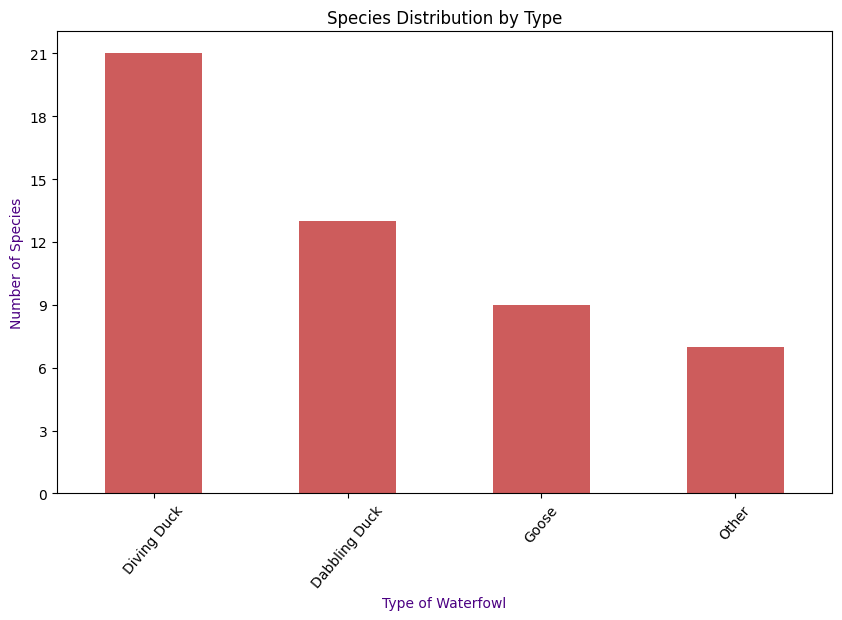

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
waterfowl_df = pd.read_csv('/kaggle/input/waterfowls/waterfowls.csv')

# Count the number of species by type
type_counts = waterfowl_df['type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='IndianRed')
plt.title('Species Distribution by Type')
plt.xlabel('Type of Waterfowl', color='Indigo')
plt.ylabel('Number of Species', color='Indigo')
plt.xticks(rotation=50)

# Setting Y-axis to display only integer values
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

2. Average Length vs. Lifespan | Box Plot or Violin Plot

id                       int64
name                    object
type                    object
latin_name              object
m_avg_length_inches    float64
f_avg_length_inches     object
m_avg_weight_lbs        object
f_avg_weight_lbs        object
life_span_year          object
egg_avg                 object
dtype: object


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


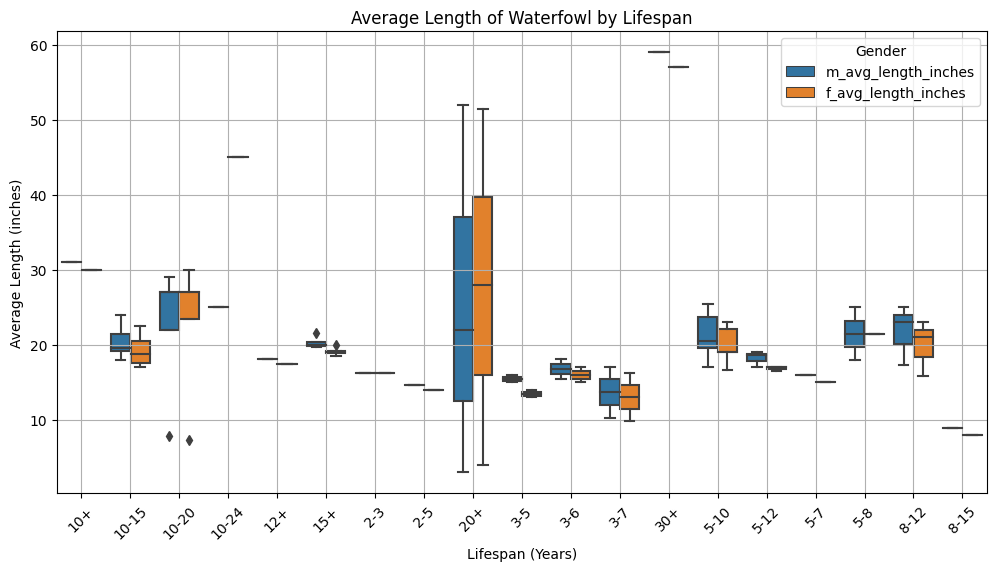

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
waterfowl_df = pd.read_csv('/kaggle/input/waterfowls/waterfowls.csv')

# Check data types and clean if necessary
print(waterfowl_df.dtypes)

# Convert 'life_span_year' to a categorical type if it's not already
waterfowl_df['life_span_year'] = waterfowl_df['life_span_year'].astype('category')

# Remove any potential whitespace and convert average lengths to numeric
waterfowl_df['m_avg_length_inches'] = pd.to_numeric(waterfowl_df['m_avg_length_inches'], errors='coerce')
waterfowl_df['f_avg_length_inches'] = pd.to_numeric(waterfowl_df['f_avg_length_inches'], errors='coerce')

# Prepare the data for plotting
# Melt the DataFrame to have a long-form DataFrame suitable for seaborn
melted_df = waterfowl_df.melt(id_vars='life_span_year', 
                    value_vars=['m_avg_length_inches', 'f_avg_length_inches'], 
                    var_name='Gender', 
                    value_name='Average Length (inches)')

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_df, x='life_span_year', y='Average Length (inches)', hue='Gender')
plt.title('Average Length of Waterfowl by Lifespan')
plt.xlabel('Lifespan (Years)')
plt.ylabel('Average Length (inches)')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.grid()
plt.show()